In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
data=pd.read_csv("/home/manikanta/Documents/ML/K-Mean/CC GENERAL.csv")

In [3]:
data.head(2)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182       95.4               0.0   
1  C10002  3202.467416           0.909091        0.0               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12

In [4]:
data.tail(2)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8948                     0.0     36.558778             0.000000   
8949                     0.0    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8948                    0.000000                               0.0   
8949                    0.666667                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8948  52.549959         55.755628              0.25       6  
8949  63.165404         88.288956              0.00       6

In [5]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
import seaborn as sns


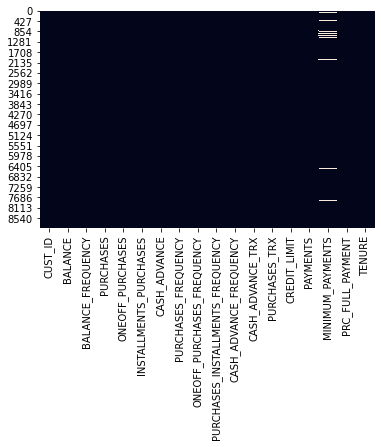

In [11]:
sns.heatmap(data.isnull(), cbar=False)

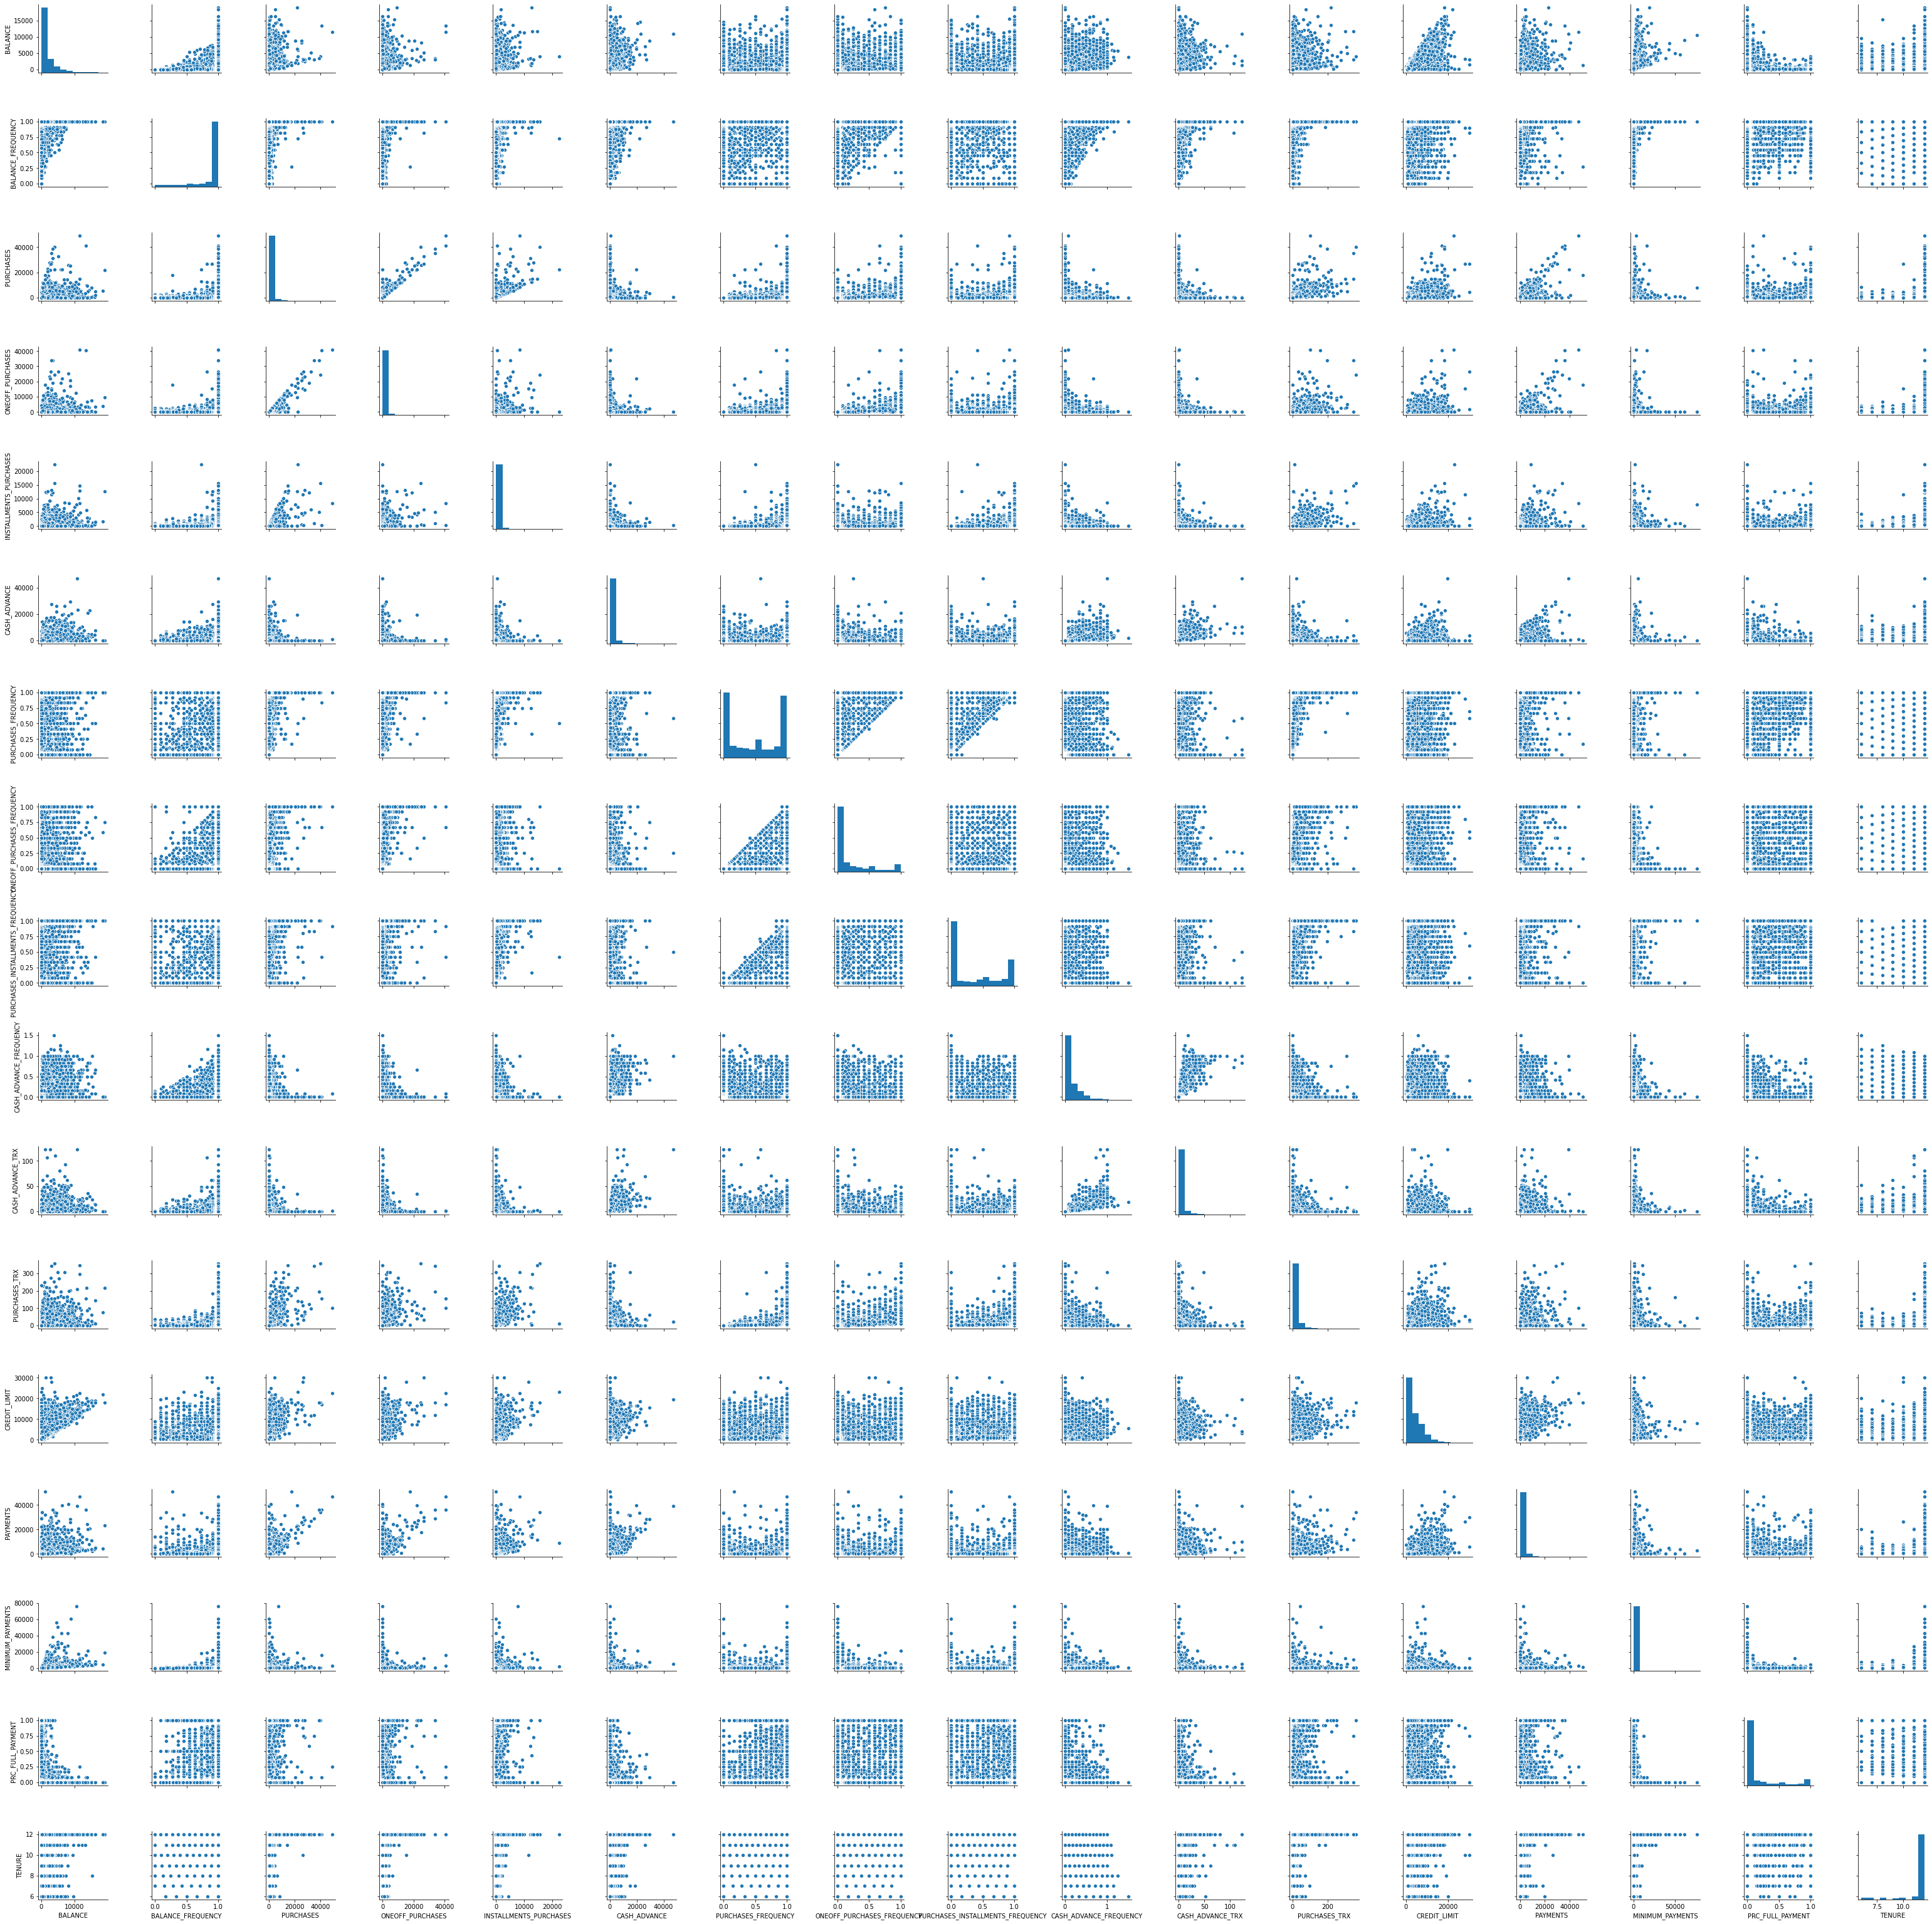

In [12]:
sns.pairplot(data)

In [13]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

In [14]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].replace(np.nan, data['MINIMUM_PAYMENTS'].mean())

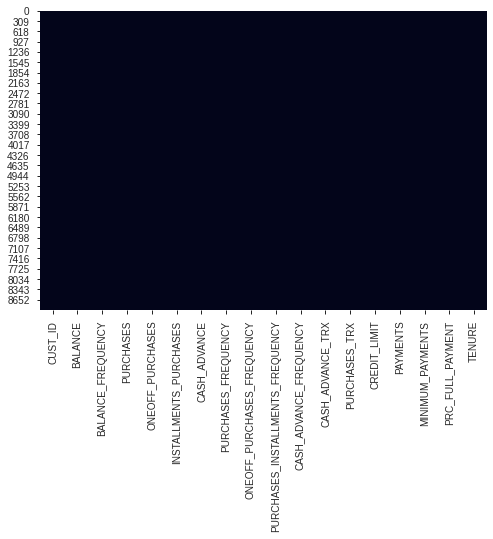

In [15]:
sns.heatmap(data.isnull(), cbar=False)

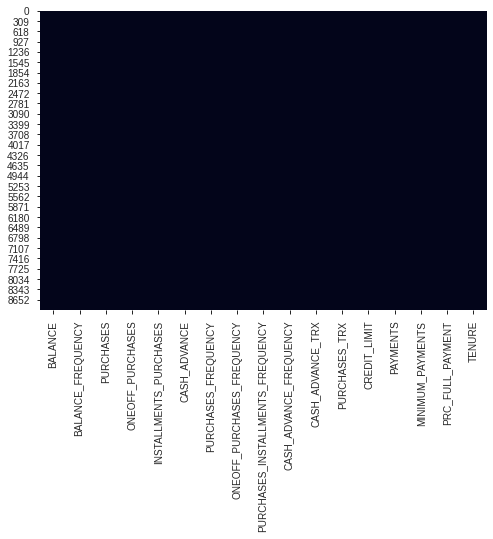

In [20]:
sns.heatmap(data1.isnull(), cbar=False)

In [17]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [42]:
data1=data.drop(['CUST_ID'], axis = 1) 

In [43]:
data1.fillna(method ='ffill', inplace = True) 

In [44]:
data1.head(2)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182       95.4               0.0   
1  3202.467416           0.909091        0.0               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12

# Data Normalization

In [45]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(data1) 

In [47]:
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=data1.columns)


In [48]:
normalized_df.head(2)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.311939          -0.106297  -0.181072         -0.152108   
1  0.219925           0.037539  -0.131222         -0.099749   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.148761     -0.198922            -0.343688   
1               -0.127036      0.728166            -0.341434   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.289213                         -0.301423   
1                   -0.189659                         -0.256265   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.287802         -0.202878      -0.217906     -0.409284   
1                0.160400          0.030761      -0.165384      0.192452   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.225426         -0.132520         -0.223965  0.153705  
1  0.228779          0.024959          0.065457  0.100796

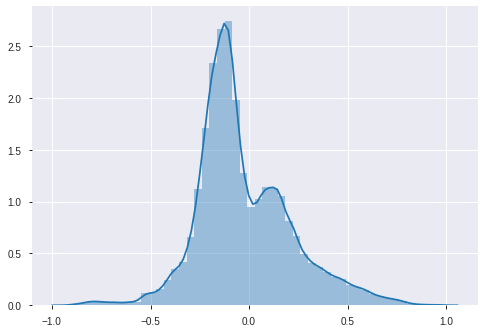

In [49]:
sns.distplot(normalized_df)

# Dendrogram

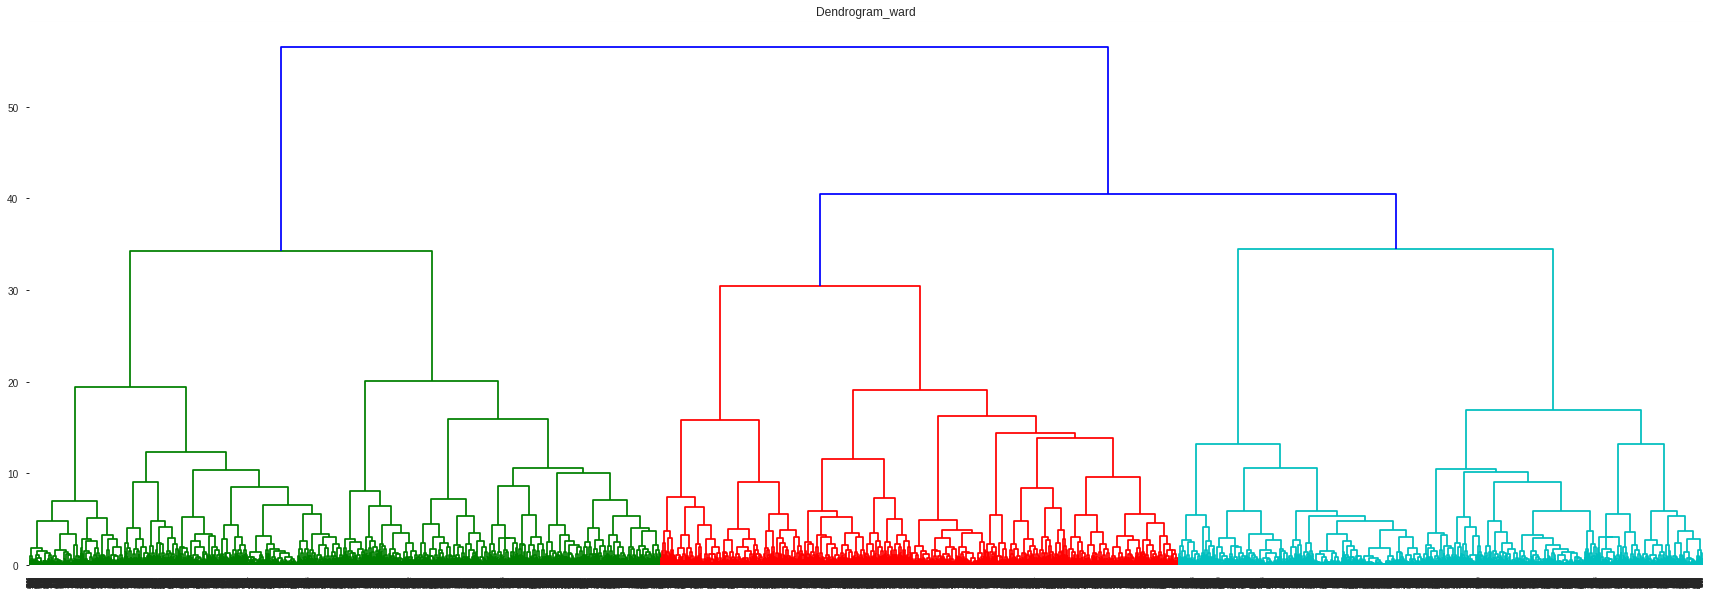

In [50]:
#linkage of ward
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,10))
plt.title("Dendrogram_ward")
dend_ward=shc.dendrogram(shc.linkage(normalized_df,method='ward'))

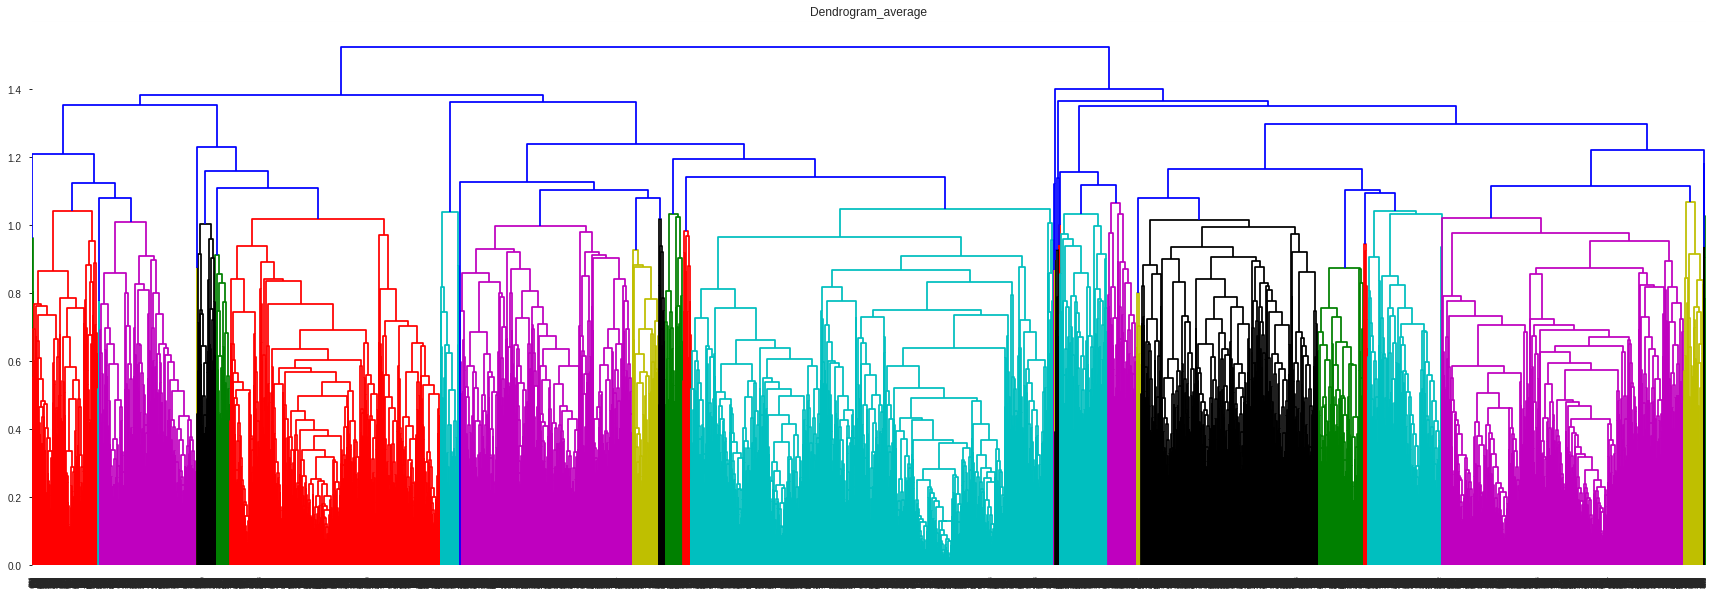

In [51]:
#linkage of average
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,10))
plt.title("Dendrogram_average")
dend_ward=shc.dendrogram(shc.linkage(normalized_df,method='average'))

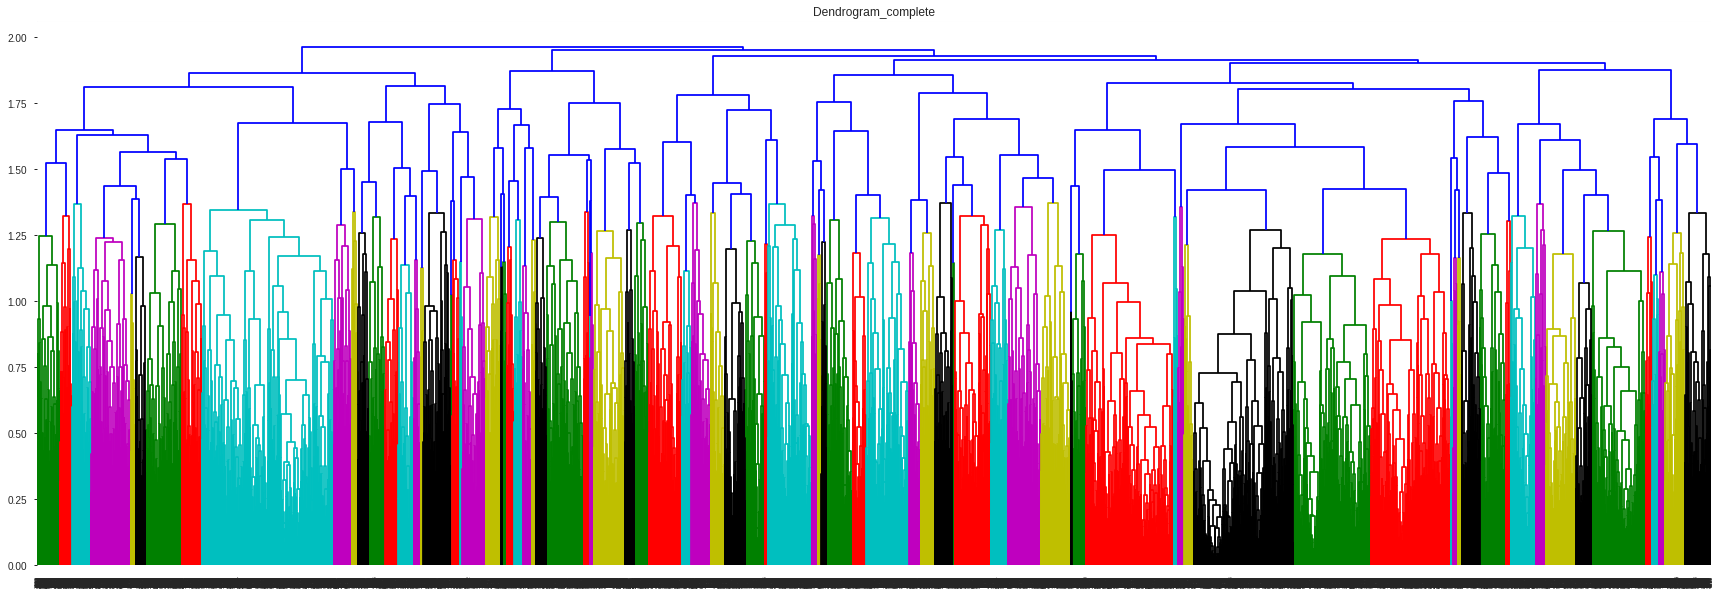

In [52]:
#linkage of complete
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,10))
plt.title("Dendrogram_complete")
dend_ward=shc.dendrogram(shc.linkage(normalized_df,method='complete'))

RecursionError: maximum recursion depth exceeded while getting the str of an object

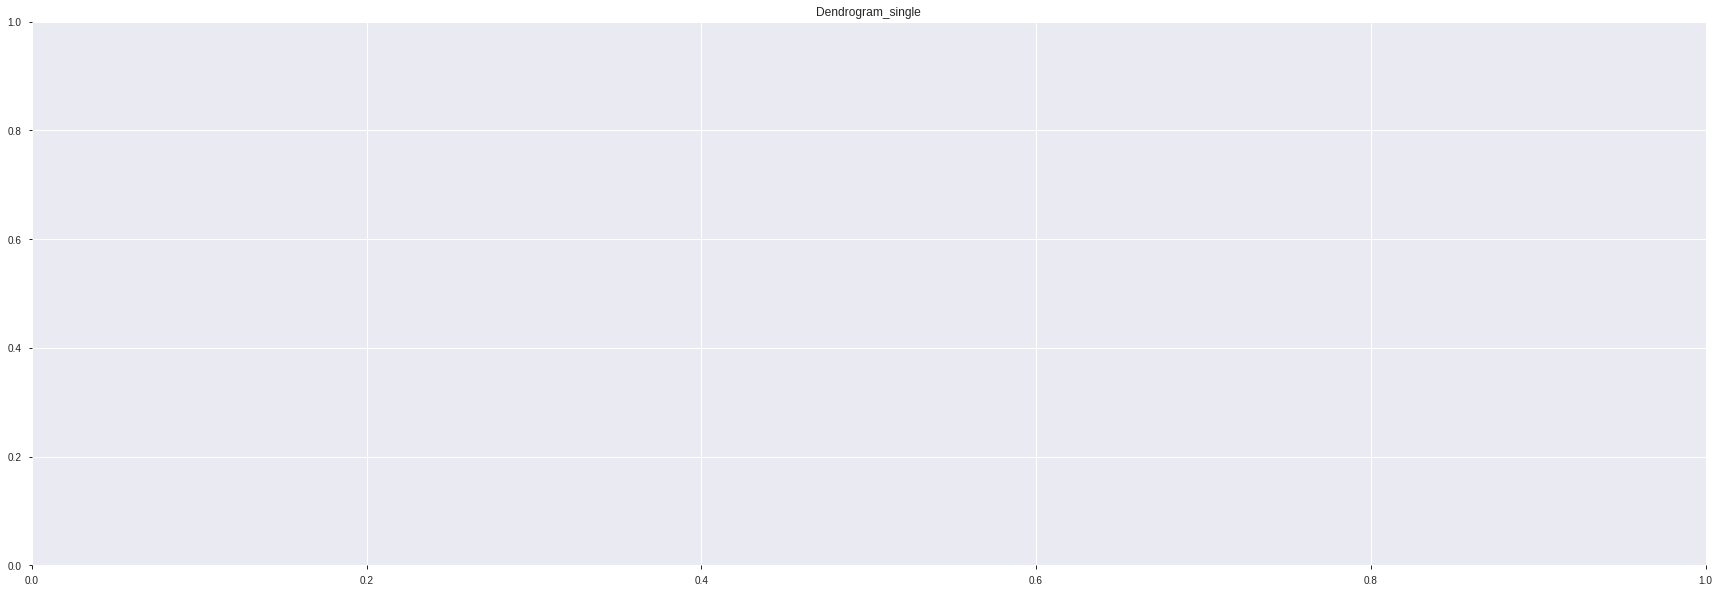

In [54]:
#linkage of single
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,10))
plt.title("Dendrogram_single")
dend_ward=shc.dendrogram(shc.linkage(normalized_df,method='single'))

# AgglomerativeClustering

In [55]:
# Euclidean Distance and ward linkage
from sklearn.cluster import AgglomerativeClustering
eud_ward=AgglomerativeClustering(affinity='euclidean',linkage='ward')
eud_ward

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [56]:
eud_ward.fit_predict(normalized_df)

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
eud_ward.n_clusters

2

In [58]:
eud_ward.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
eud_ward.children_

array([[ 5219,  8442],
       [  181,  4401],
       [ 4629,  7919],
       ...,
       [17884, 17890],
       [17894, 17896],
       [17895, 17897]])

In [60]:
data1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

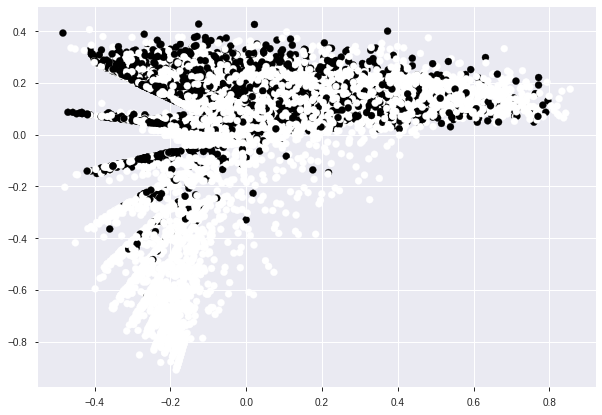

In [61]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['BALANCE'],normalized_df['BALANCE_FREQUENCY'],c=eud_ward.labels_)

# Euclidean Distance and Average linkage


In [62]:
eud_avg=AgglomerativeClustering(affinity='euclidean',linkage='average')
eud_avg

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

In [63]:
eud_avg.fit_predict(normalized_df)

array([1, 1, 0, ..., 1, 1, 1])

In [64]:
eud_avg.labels_

array([1, 1, 0, ..., 1, 1, 1])

In [66]:
eud_avg.children_

array([[ 5219,  8442],
       [  181,  4401],
       [ 1131,  8951],
       ...,
       [17893, 17894],
       [17877, 17895],
       [17896, 17897]])

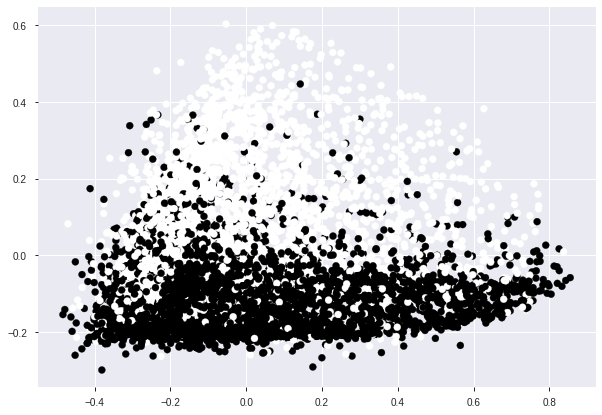

In [67]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['BALANCE'],normalized_df['PURCHASES'],c=eud_avg.labels_)

# Euclidean Distance and complete linkage

In [68]:
eud_cmp=AgglomerativeClustering(affinity='euclidean',linkage='complete')
eud_cmp

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)

In [69]:
eud_cmp.fit_predict(normalized_df)


array([0, 0, 1, ..., 0, 0, 0])

In [70]:
eud_cmp.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
eud_cmp.children_

array([[ 5219,  8442],
       [  181,  4401],
       [ 4629,  7919],
       ...,
       [17884, 17895],
       [17892, 17896],
       [17891, 17897]])

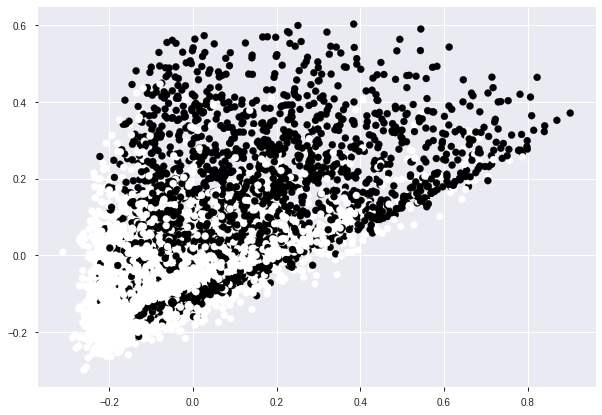

In [72]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['INSTALLMENTS_PURCHASES'],normalized_df['PURCHASES'],c=eud_cmp.labels_)

# Euclidean Distance and single linkage

eud_single=AgglomerativeClustering(affinity='euclidean',linkage='single')
eud_single

In [74]:
eud_single.fit_predict(normalized_df)

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
eud_single.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
eud_single.children_

array([[ 5219,  8442],
       [  181,  4401],
       [ 1131,  8951],
       ...,
       [ 3741, 17895],
       [ 2460, 17896],
       [ 6019, 17897]])

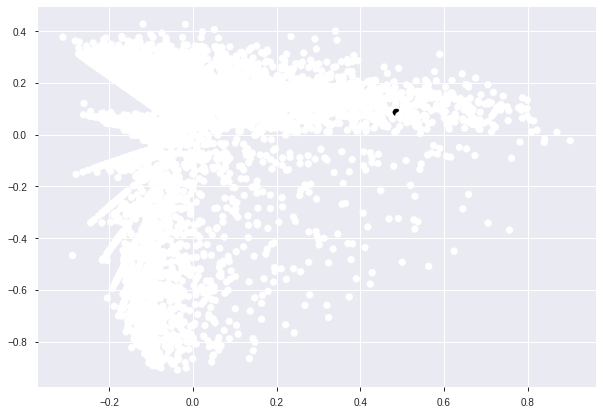

In [78]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['INSTALLMENTS_PURCHASES'],normalized_df['BALANCE_FREQUENCY'],c=eud_single.labels_)

# Manhattan Distance and average linkage


In [82]:
man_avg=AgglomerativeClustering(affinity='manhattan',linkage='average')
man_avg

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

In [83]:
man_avg.fit_predict(normalized_df)

array([0, 0, 1, ..., 0, 0, 0])

In [84]:
man_avg.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [85]:
man_avg.children_

array([[  181,  4401],
       [ 5219,  8442],
       [ 1131,  8950],
       ...,
       [17885, 17890],
       [17893, 17896],
       [17895, 17897]])

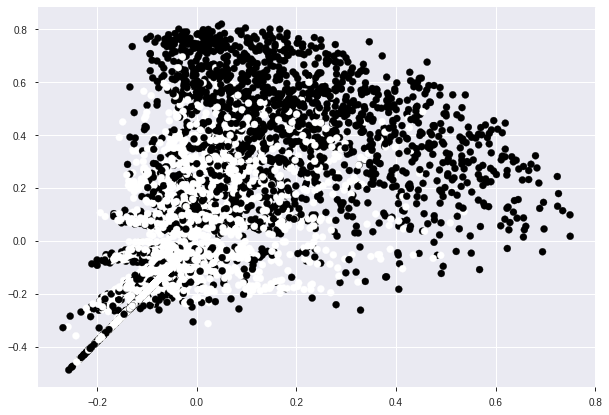

In [86]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['ONEOFF_PURCHASES'],normalized_df['ONEOFF_PURCHASES_FREQUENCY'],c=man_avg.labels_)

# Manhattan Distance and Complete Linkage

In [87]:
man_cmp=AgglomerativeClustering(affinity='manhattan',linkage='complete')
man_cmp

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)

In [88]:
man_cmp.fit_predict(normalized_df)

array([1, 1, 0, ..., 0, 0, 0])

In [89]:
man_cmp.labels_

array([1, 1, 0, ..., 0, 0, 0])

In [90]:
man_cmp.children_

array([[  181,  4401],
       [ 5219,  8442],
       [ 4629,  7919],
       ...,
       [17890, 17891],
       [17894, 17896],
       [17895, 17897]])

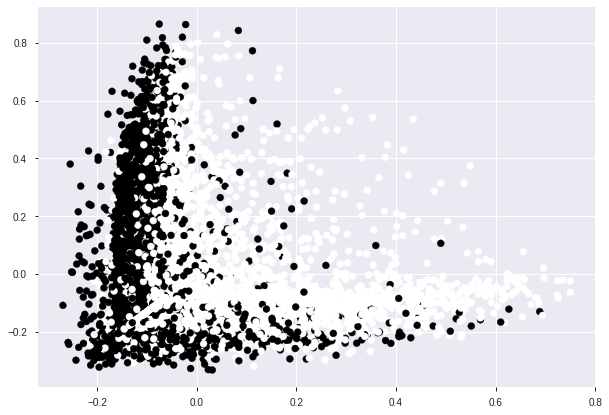

In [91]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['ONEOFF_PURCHASES'],normalized_df['CASH_ADVANCE'],c=man_cmp.labels_)

# Manhattan Distance and Complete Linkage

In [92]:
man_single=AgglomerativeClustering(affinity='manhattan',linkage='single')
man_single

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2)

In [93]:
man_single.fit_predict(normalized_df)

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
man_single.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
man_single.children_

array([[  181,  4401],
       [ 5219,  8442],
       [ 1131,  8950],
       ...,
       [ 6019, 17895],
       [ 7216, 17896],
       [ 2808, 17897]])

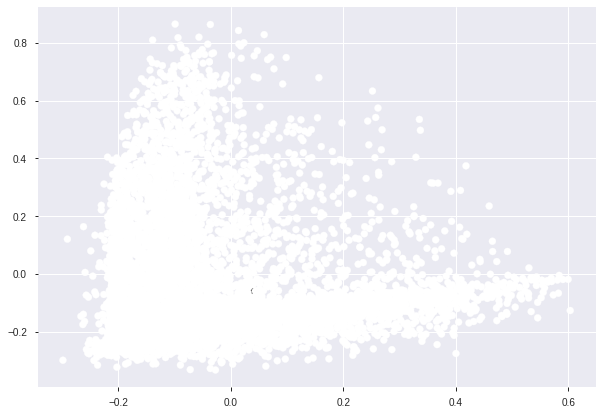

In [98]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['PURCHASES'],normalized_df['CASH_ADVANCE'],c=man_single.labels_)

# Minkowski Distance and Average Linkage

In [99]:
min_avg=AgglomerativeClustering(affinity='minkowski',linkage='average')
min_avg

AgglomerativeClustering(affinity='minkowski', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

In [100]:
min_avg.fit_predict(normalized_df)

array([1, 1, 0, ..., 1, 1, 1])

In [101]:
min_avg.labels_

array([1, 1, 0, ..., 1, 1, 1])

In [102]:
min_avg.children_

array([[ 5219,  8442],
       [  181,  4401],
       [ 1131,  8951],
       ...,
       [17893, 17894],
       [17877, 17895],
       [17896, 17897]])

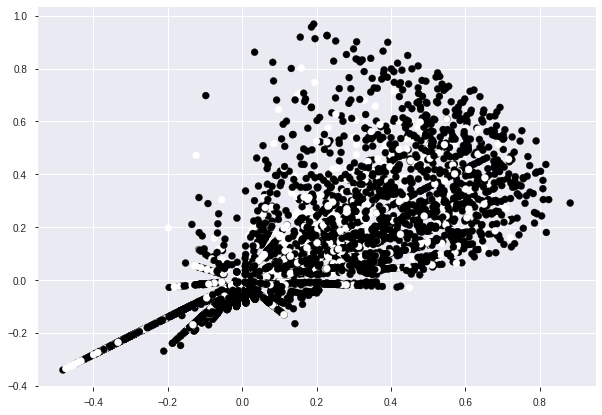

In [103]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['CASH_ADVANCE_FREQUENCY'],normalized_df['CASH_ADVANCE_TRX'],c=min_avg.labels_)

# Minkowski Distance and  Complete Linkage

In [104]:
min_cmp=AgglomerativeClustering(affinity='minkowski',linkage='complete')
min_cmp

AgglomerativeClustering(affinity='minkowski', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)

In [105]:
min_cmp.fit_predict(normalized_df)

array([0, 0, 1, ..., 0, 0, 0])

In [106]:
min_cmp.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [107]:
min_cmp.children_

array([[ 5219,  8442],
       [  181,  4401],
       [ 4629,  7919],
       ...,
       [17884, 17895],
       [17892, 17896],
       [17891, 17897]])

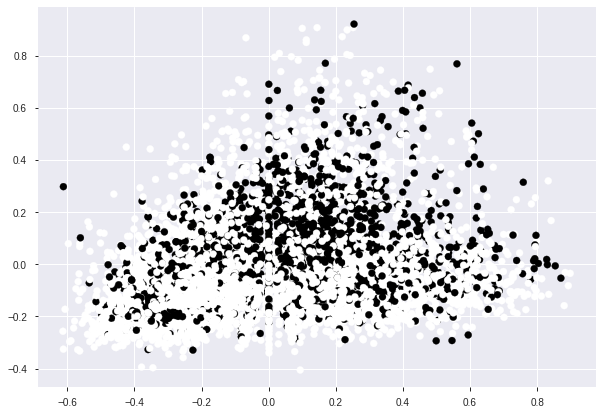

In [108]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['CREDIT_LIMIT'],normalized_df['PAYMENTS'],c=min_cmp.labels_)

# Minkowski Distance and Single linkage

In [109]:
min_single=AgglomerativeClustering(affinity='minkowski',linkage='single')
min_single

AgglomerativeClustering(affinity='minkowski', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2)

In [110]:
min_single.fit_predict(normalized_df)

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
min_single.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
min_single.children_

array([[ 5219,  8442],
       [  181,  4401],
       [ 1131,  8951],
       ...,
       [ 3741, 17895],
       [ 2460, 17896],
       [ 6019, 17897]])

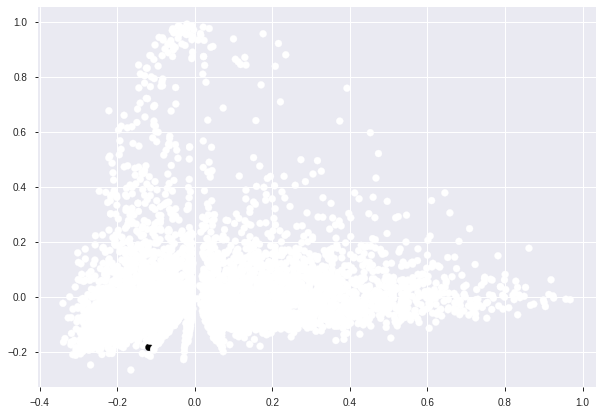

In [113]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['CASH_ADVANCE_TRX'],normalized_df['MINIMUM_PAYMENTS'],c=min_single.labels_)

 # Hamming Distance and Average linkage

In [114]:
ham_avg=AgglomerativeClustering(affinity='hamming',linkage='average')
ham_avg

AgglomerativeClustering(affinity='hamming', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

In [115]:
ham_avg.fit_predict(normalized_df)

array([0, 0, 0, ..., 0, 0, 1])

In [116]:
ham_avg.labels_

array([0, 0, 0, ..., 0, 0, 1])

In [117]:
ham_avg.children_

array([[ 8583,  8593],
       [ 8596,  8950],
       [ 8619,  8951],
       ...,
       [ 8947, 17895],
       [ 8948, 17896],
       [ 8949, 17897]])

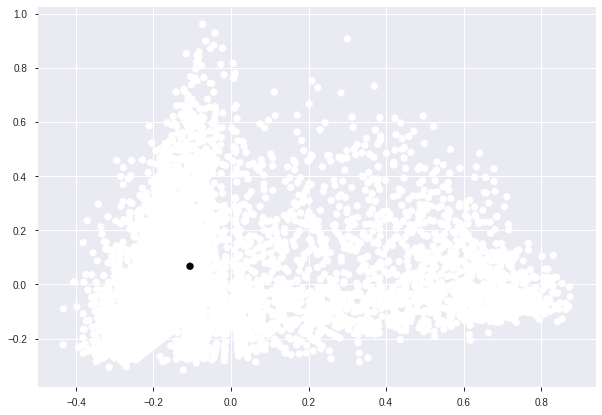

In [118]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['PRC_FULL_PAYMENT'],normalized_df['PURCHASES_TRX'],c=ham_avg.labels_)

# Hamming Distance and Complete Linkage

In [119]:
ham_cmp=AgglomerativeClustering(affinity='hamming',linkage='complete')
ham_cmp

AgglomerativeClustering(affinity='hamming', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2)

In [120]:
ham_cmp.fit_predict(normalized_df)

array([0, 0, 0, ..., 0, 0, 1])

In [121]:
ham_cmp.labels_

array([0, 0, 0, ..., 0, 0, 1])

In [122]:
ham_cmp.children_

array([[    3,    45],
       [   47,  8950],
       [   54,  8951],
       ...,
       [ 8947, 17895],
       [ 8948, 17896],
       [ 8949, 17897]])

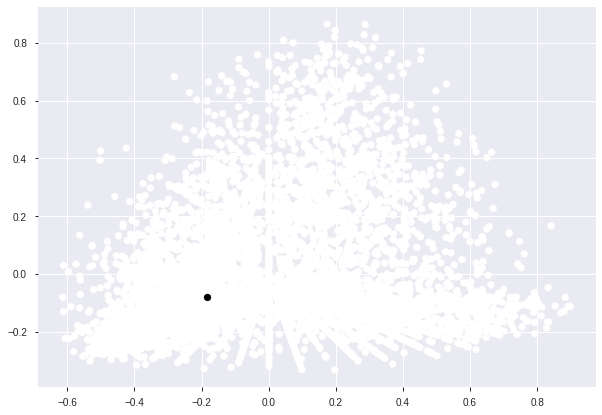

In [123]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['CREDIT_LIMIT'],normalized_df['CASH_ADVANCE'],c=ham_cmp.labels_)

# Hamming Distance and Single Linkage

In [125]:
ham_single=AgglomerativeClustering(affinity='hamming',linkage='single')
ham_single

AgglomerativeClustering(affinity='hamming', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2)

In [126]:
ham_single.fit_predict(normalized_df)

array([0, 0, 0, ..., 0, 0, 1])

In [127]:
ham_single.labels_

array([0, 0, 0, ..., 0, 0, 1])

In [128]:
ham_single.children_

array([[    3,    45],
       [   47,  8950],
       [   54,  8951],
       ...,
       [ 8947, 17895],
       [ 8948, 17896],
       [ 8949, 17897]])

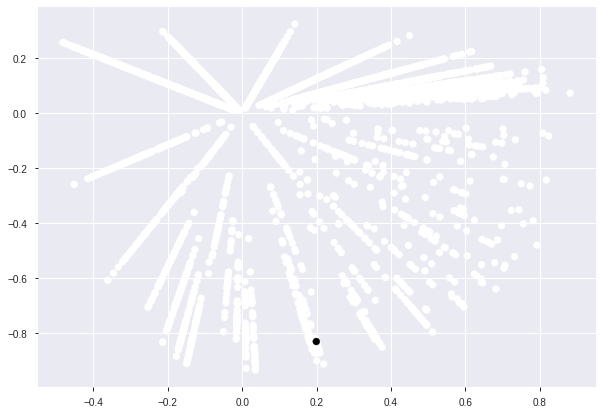

In [129]:
plt.figure(figsize=(10,7))
plt.scatter(normalized_df['CASH_ADVANCE_FREQUENCY'],normalized_df['TENURE'],c=ham_single.labels_)